In [106]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python  sklearn matplotlib

In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time


In [6]:
!pip install mediapipe
import mediapipe as mp

In [7]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections
    

In [10]:
def draw_styled_landmarks(image, results):

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [11]:
cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():


       ret,frame=cap.read()
       image,results=mediapipe_detection(frame,holistic)
       print(results)
       draw_landmarks(image,results)
       cv2.imshow('Open feed',image) 


       if cv2.waitKey(10) & 0xFF==ord('q'):
            break
        
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
len(results.pose_landmarks.landmark)

33

In [1]:
#len(results.left_hand_landmarks.landmark)

In [2]:
#len(results.right_hand_landmarks.landmark)

In [15]:
results

mediapipe.python.solution_base.SolutionOutputs

In [16]:
frame

array([[[212, 199, 205],
        [214, 199, 206],
        [215, 199, 206],
        ...,
        [119, 118, 125],
        [121, 119, 128],
        [115, 113, 122]],

       [[213, 199, 205],
        [214, 199, 206],
        [215, 199, 206],
        ...,
        [119, 118, 125],
        [124, 124, 131],
        [124, 125, 133]],

       [[215, 199, 206],
        [215, 199, 206],
        [215, 199, 206],
        ...,
        [121, 121, 128],
        [114, 116, 123],
        [112, 116, 122]],

       ...,

       [[181, 170, 172],
        [181, 170, 172],
        [181, 170, 172],
        ...,
        [134, 149, 154],
        [133, 148, 153],
        [133, 148, 154]],

       [[181, 170, 170],
        [181, 170, 170],
        [181, 170, 170],
        ...,
        [133, 150, 154],
        [131, 149, 153],
        [130, 148, 152]],

       [[182, 170, 169],
        [182, 170, 169],
        [182, 170, 169],
        ...,
        [132, 150, 153],
        [129, 148, 151],
        [129, 149, 151]]

In [17]:
draw_landmarks(frame, results)

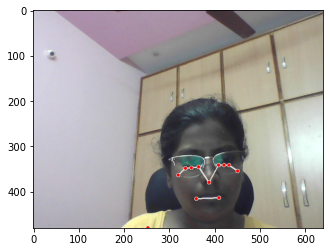

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [19]:
results.pose_landmarks.landmark[0].visibility

0.9992832541465759

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
pose

[array([ 0.6070677 ,  0.79056126, -1.42303264,  0.99928325]),
 array([ 0.64029044,  0.71202046, -1.3373369 ,  0.99930573]),
 array([ 0.65871203,  0.71135908, -1.33757031,  0.99934995]),
 array([ 0.67521513,  0.7113502 , -1.33746314,  0.99914938]),
 array([ 0.57057869,  0.71896803, -1.35079277,  0.99930757]),
 array([ 0.54634678,  0.72298902, -1.35113442,  0.99930429]),
 array([ 0.52650046,  0.72684735, -1.35140038,  0.99914783]),
 array([ 0.70519501,  0.73855197, -0.80776513,  0.99928331]),
 array([ 0.50029302,  0.7563954 , -0.86241657,  0.9994027 ]),
 array([ 0.64104396,  0.8623957 , -1.21781325,  0.99464941]),
 array([ 0.56306159,  0.86629134, -1.23573816,  0.99486589]),
 array([ 0.78239375,  1.00434244, -0.56440735,  0.70117819]),
 array([ 0.39566162,  0.99908131, -0.55840051,  0.6925782 ]),
 array([ 0.85818946,  1.21273422, -1.05261409,  0.14777477]),
 array([ 0.29558596,  1.30771649, -0.99059135,  0.09666248]),
 array([ 0.74288124,  1.08986545, -1.62450659,  0.11309169]),
 array([

In [22]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)



In [23]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [24]:
rh=np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [25]:
pose

array([ 6.07067704e-01,  7.90561259e-01, -1.42303264e+00,  9.99283254e-01,
        6.40290439e-01,  7.12020457e-01, -1.33733690e+00,  9.99305725e-01,
        6.58712029e-01,  7.11359084e-01, -1.33757031e+00,  9.99349952e-01,
        6.75215125e-01,  7.11350203e-01, -1.33746314e+00,  9.99149382e-01,
        5.70578694e-01,  7.18968034e-01, -1.35079277e+00,  9.99307573e-01,
        5.46346784e-01,  7.22989023e-01, -1.35113442e+00,  9.99304295e-01,
        5.26500463e-01,  7.26847351e-01, -1.35140038e+00,  9.99147832e-01,
        7.05195010e-01,  7.38551974e-01, -8.07765126e-01,  9.99283314e-01,
        5.00293016e-01,  7.56395400e-01, -8.62416565e-01,  9.99402702e-01,
        6.41043961e-01,  8.62395704e-01, -1.21781325e+00,  9.94649410e-01,
        5.63061595e-01,  8.66291344e-01, -1.23573816e+00,  9.94865894e-01,
        7.82393754e-01,  1.00434244e+00, -5.64407349e-01,  7.01178193e-01,
        3.95661622e-01,  9.99081314e-01, -5.58400512e-01,  6.92578197e-01,
        8.58189464e-01,  

In [26]:
lh.shape

(63,)

In [27]:
np.zeros(21*3).shape

(63,)

In [28]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [31]:
result_test=extract_keypoints(results)[:10]

In [32]:
result_test

array([ 0.6070677 ,  0.79056126, -1.42303264,  0.99928325,  0.64029044,
        0.71202046, -1.3373369 ,  0.99930573,  0.65871203,  0.71135908])

In [33]:
np.save('0', result_test)

In [34]:
np.load('0.npy')

array([ 0.6070677 ,  0.79056126, -1.42303264,  0.99928325,  0.64029044,
        0.71202046, -1.3373369 ,  0.99930573,  0.65871203,  0.71135908])

In [35]:

DATA_PATH = os.path.join('ABC') 
actions = np.array(['A','B','C'])
no_sequences = 30
sequence_length = 30

In [36]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [37]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [38]:
cap.release()
cv2.destroyAllWindows()

In [39]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [40]:
label_map = {label:num for num, label in enumerate(actions)}

In [41]:
label_map

{'A': 0, 'B': 1, 'C': 2}

In [42]:
sequences, labels = [], []
ac
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [43]:
np.array(sequences).shape

(90, 30, 258)

In [44]:
np.array(labels).shape

(90,)

In [45]:
X = np.array(sequences)

In [46]:
X.shape

(90, 30, 258)

In [47]:
y = to_categorical(labels).astype(int)

In [48]:
y.shape

(90, 3)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [50]:
y_test.shape

(5, 3)

In [51]:
X_test.shape

(5, 30, 258)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [53]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [54]:
X.shape

(90, 30, 258)

In [114]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [115]:
actions.shape[0]

3

In [116]:
res=[.7,0.2,3.5]

In [117]:
res

[0.7, 0.2, 3.5]

In [118]:
actions[np.argmax(res)]

'C'

In [119]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
3/3 [==============================] - 5s 2s/step - loss: 1.1603 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 37ms/step - loss: 1.0705 - categorical_accuracy: 0.4588
Epoch 3/2000
3/3 [==============================] - 0s 35ms/step - loss: 1.0603 - categorical_accuracy: 0.4706
Epoch 4/2000
3/3 [==============================] - 0s 35ms/step - loss: 0.9089 - categorical_accuracy: 0.6824
Epoch 5/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.7315 - categorical_accuracy: 0.7176
Epoch 6/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.8213 - categorical_accuracy: 0.6118
Epoch 7/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.6462 - categorical_accuracy: 0.7882
Epoch 8/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.6569 - categorical_accuracy: 0.6824
Epoch 9/2000
3/3 [==============================] - 0s 36ms/step - loss: 0.6349 - categorical_accuracy: 0.7176
Epo

In [ ]:
model.summary()

In [ ]:
res = model.predict(X_test)

In [ ]:
res

In [ ]:
actions[np.argmax(res[2])]

In [ ]:
actions[np.argmax(y_test[2])]

In [ ]:
model.save('signweights.h5')


In [ ]:
del model

In [ ]:
model.load_weights('signweights.h5')

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:

accuracy_score(ytrue, yhat)

In [ ]:
sequence=[]
sentence=[]
threshold=0.4

cap=cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():


       ret,frame=cap.read()
       image,results=mediapipe_detection(frame,holistic)
       print(results)
       draw_landmarks(image,results)
        
       keypoints = extract_keypoints(results)
       sequence.insert(0,keypoints)
       sequence = sequence[:30]
        
       if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
       if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

       if len(sentence) > 5: 
          sentence = sentence[-5:]

       cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
       cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
            
            
             
       cv2.imshow('Open feed',image) 


       if cv2.waitKey(10) & 0xFF==ord('q'):
            break
        
        
    cap.release()
    cv2.destroyAllWindows()